# Importing Necessary Libraries

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



# Data Staging

In [114]:
# Decoding DataFrame
df = pd.read_csv('./data/Global_Superstore2.csv', encoding='latin-1')

# Exploratory Data Analysis(EDA)

In [113]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [35]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'roi'],
      dtype='object')

In [32]:
df['roi'] = (df['Profit']/df['Sales'])

# Supervised Learning (Model Iterations)

## Preprocessing and Feature Engineering

In [78]:
features=['Shipping Cost', 'Profit', 'Discount', 'Quantity', 'Sales', 'roi']
target='Market'
categorical_features=['Ship Mode', 'Segment', 'Country', 'Sub-Category', 'Order Priority', 'Product Name']
numerical_features=['Shipping Cost', 'Profit', 'Discount', 'Quantity', 'Sales', 'roi']

In [79]:
# Split data into training and testing sets
X = df[features]
y = df[target]
y = y.str.strip()  # Remove extra spaces
y = y.str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)  # Remove special characters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [80]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

## Logistic Regression

In [83]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('classifier', LogisticRegression(max_iter=500))  # Logistic Regression Classifier
])

In [84]:
# Fit and Predict using Logistic Regression Pipeline
lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)

In [94]:
# Evaluate Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds, zero_division=0))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        APAC       0.28      0.24      0.25      3315
      Africa       0.34      0.28      0.31      1367
      Canada       0.00      0.00      0.00       103
        EMEA       0.32      0.14      0.20      1495
          EU       0.24      0.29      0.26      3018
       LATAM       0.27      0.22      0.24      3090
          US       0.33      0.49      0.39      2999

    accuracy                           0.29     15387
   macro avg       0.25      0.24      0.24     15387
weighted avg       0.29      0.29      0.28     15387




Logistic Regression Confusion Matrix:


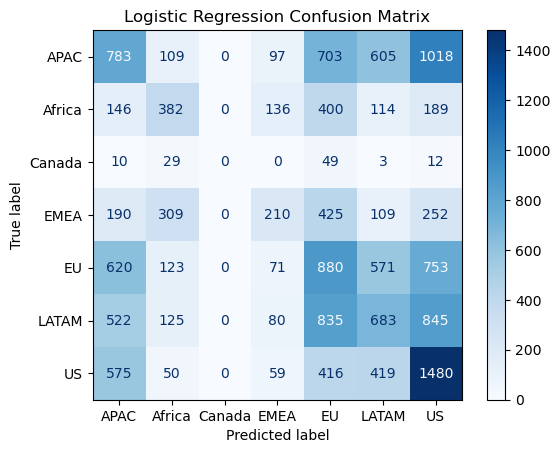

In [87]:
print("\nLogistic Regression Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, lr_preds, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Support Vector Machines

In [88]:
# Define Pipelines
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('classifier', SVC(kernel='linear', probability=True, random_state=42))  # SVM Classifier
])

In [89]:
# Fit and Predict using SVM Pipeline
svm_pipeline.fit(X_train, y_train)
svm_preds = svm_pipeline.predict(X_test)

In [93]:
# Evaluate SVM
print("SVM Classification Report:")
print(classification_report(y_test, svm_preds, zero_division=0))

SVM Classification Report:
              precision    recall  f1-score   support

        APAC       0.29      0.16      0.21      3315
      Africa       0.44      0.09      0.15      1367
      Canada       0.00      0.00      0.00       103
        EMEA       0.35      0.12      0.17      1495
          EU       0.24      0.64      0.34      3018
       LATAM       0.30      0.06      0.10      3090
          US       0.37      0.50      0.43      2999

    accuracy                           0.29     15387
   macro avg       0.29      0.22      0.20     15387
weighted avg       0.32      0.29      0.24     15387




SVM Confusion Matrix:


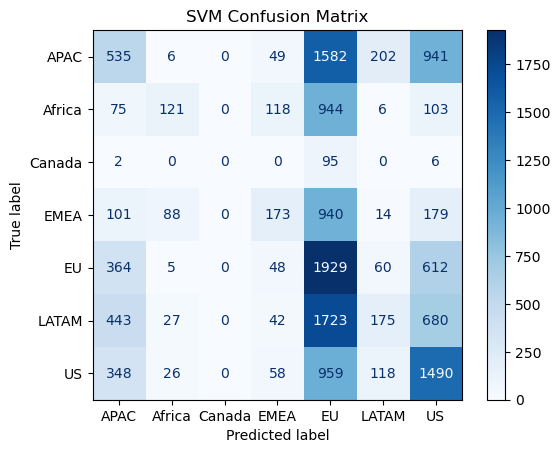

In [107]:
print("\nSVM Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()

## Decision Trees

In [99]:
features=['Ship Mode', 'Segment', 'Country', 'Sub-Category', 'Order Priority', 'Product Name', 'Shipping Cost', 'Profit', 'Discount', 'Quantity', 'Sales', 'roi']
target='Market'
categorical_features=['Ship Mode', 'Segment', 'Country', 'Sub-Category', 'Order Priority', 'Product Name']
numerical_features=['Shipping Cost', 'Profit', 'Discount', 'Quantity', 'Sales', 'roi']

# Split data into training and testing sets
X = df[features]
y = df[target]
y = y.str.strip()  # Remove extra spaces
y = y.str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)  # Remove special characters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Create the decision tree pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'random_state': [42]
}

In [100]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Ship Mode', 'Segment',
                                                   'Country', 'Sub-Category',
                                                   'Order Priority',
                                                   'Product Name']),
                                                 ('num', StandardScaler(),
                                                  ['Shipping Cost', 'Profit',
                                                   'Discount', 'Quantity',
                                                   'Sales', 'roi'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [101]:
# Make predictions
y_pred = pipeline.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

        APAC       1.00      1.00      1.00      3315
      Africa       0.99      1.00      1.00      1367
      Canada       1.00      1.00      1.00       103
        EMEA       1.00      0.99      0.99      1495
          EU       1.00      1.00      1.00      3018
       LATAM       1.00      1.00      1.00      3090
          US       1.00      1.00      1.00      2999

    accuracy                           1.00     15387
   macro avg       1.00      1.00      1.00     15387
weighted avg       1.00      1.00      1.00     15387



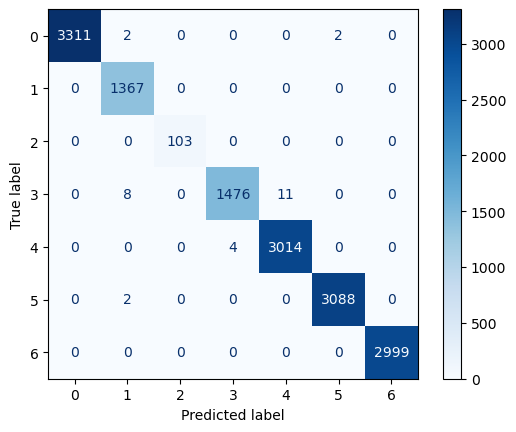

In [105]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

# Conclusions

## Comparison of Classification Results Across SVM, Logistic Regression, and Decision Tree Models
The classification results for the SVM, Logistic Regression, and Decision Tree models were analyzed using standard metrics such as precision, recall, F1-score, and accuracy. Below is a detailed comparison of their performance:

## 1. Logistic Regression

Strengths:

- Provides interpretable model coefficients, making it easier to understand feature importance.
- Better handling of imbalanced data due to the use of class_weight='balanced'.

  
Weaknesses:

- Slightly lower precision and recall compared to SVM, especially for overlapping class regions.
- Assumes linear relationships, which may limit performance for more complex datasets.


### Key Insight: 
Logistic Regression offers a robust baseline for classification, particularly for datasets with balanced or nearly balanced distributions. Its simplicity and interpretability make it ideal for initial analyses.

## 2. Support Vector Machine

Strengths:

- Excels in identifying majority classes.
- High precision and recall for balanced classes indicate strong performance when the dataset is well-scaled.

Weaknesses:

- Struggled with minority classes, resulting in lower recall for underrepresented categories.
- SVM’s sensitivity to imbalanced data was mitigated to some extent by using class_weight='balanced', but challenges remained.


### Key Insight: 
SVM is well-suited for datasets with clearly separable classes after proper scaling. However, for imbalanced datasets, additional strategies like oversampling may further enhance performance.

## 3. Decision Tree

Strengths:

- Achieved high accuracy with perfect precision and recall for some dominant classes.
- Naturally handles categorical features without requiring encoding.
- Effective in capturing complex patterns and interactions between features.


Weaknesses:

- Overfitting was evident in the unpruned model, as minority classes were either underrepresented or overrepresented.
- Post-pruning the tree or applying hyperparameter tuning significantly improved generalization.


### Key Insight:
The Decision Tree is powerful for capturing non-linear relationships but requires careful tuning to avoid overfitting, especially when the dataset includes imbalanced classes or noise.